<a href="https://colab.research.google.com/github/sunnatillo91/ai-datascience/blob/main/4DL_SGrdientDesent_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Science va Sun'iy Intellekt Praktikum

## 6-MODUL. Deep Learning

## lV-qism

### Deep Learning
### Stochastic Gradient Desent (SGD) uchun to'liq misol

In [2]:
# Kutubxonalarni yuklab olish
import torch
import fastai

from fastai.vision.all import *

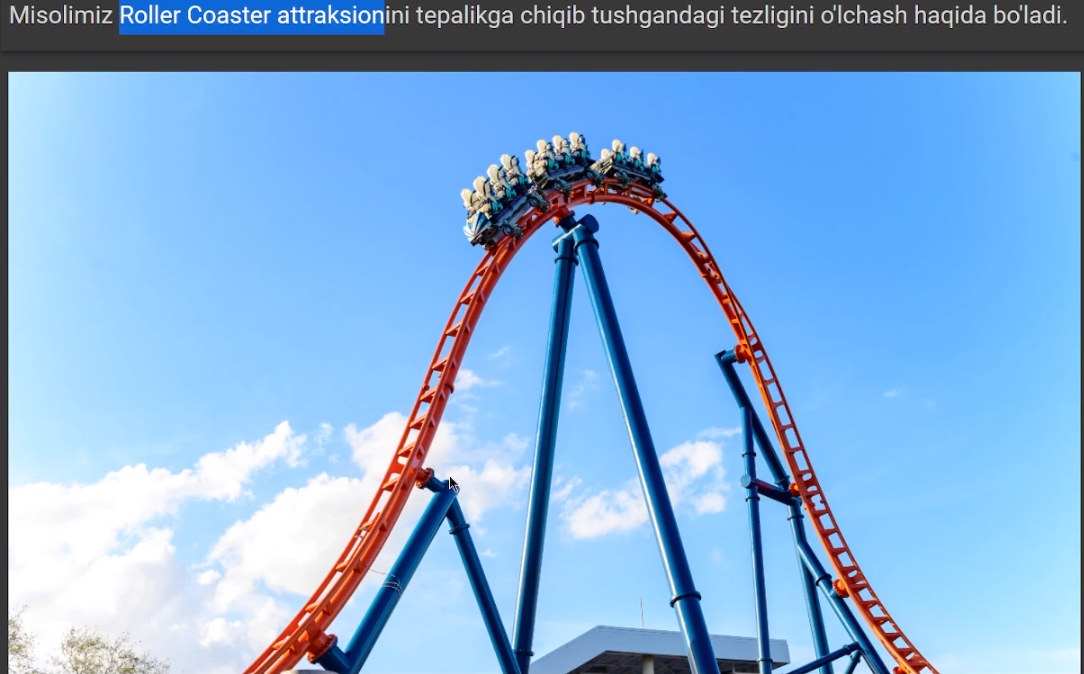

In [3]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

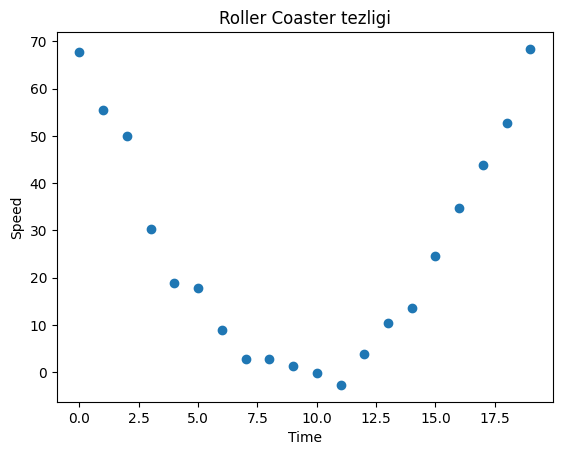

In [20]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

#plotting
import matplotlib.pyplot as plt
plt.scatter(time,speed)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Roller Coaster tezligi')
plt.show()

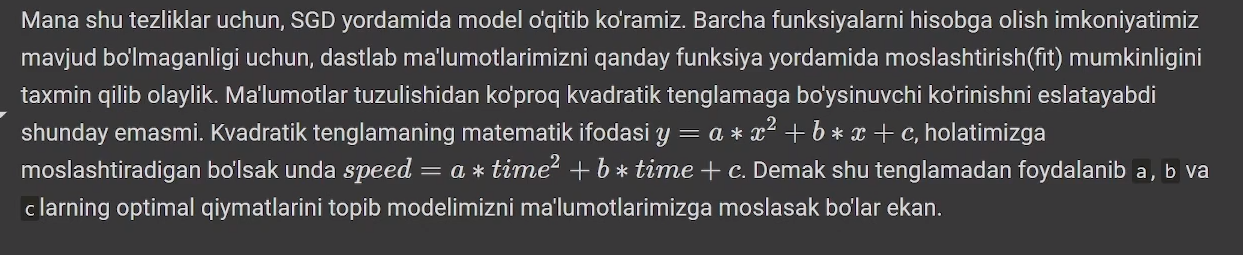

### Kvadratik funksiya yaratuvchi

In [5]:
def f(t, params):
    """
    Kvadrat funksiya
    """
    a, b, c = params
    return a * t**2 + b * t + c

Lossni hisoblash funksiyasi: MSE (Mean Squared Error)

In [22]:
# loss function
def mse(preds, targets):
    return np.mean((preds - targets)**2).mean().item()

### 7 ta qadamlarni ketma-ket bajaramiz:

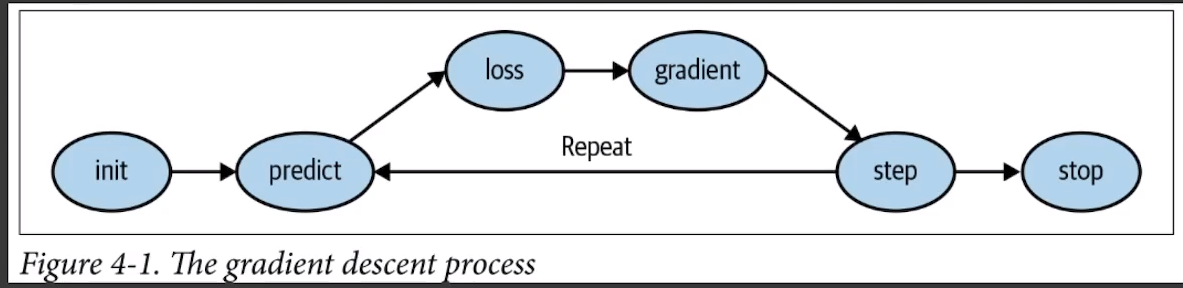

### 1. Initailze (Vaznlarni boshlang'ich qiymatini yaratib olish)

In [7]:
params = torch.randn(3).requires_grad_()
params

tensor([ 0.6949, -0.7425,  1.6642], requires_grad=True)

### 2. Prediction (Bashorat)

In [8]:
preds = f(time, params)

In [50]:
#@title show_preds()
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed, label='data')
  ax.scatter(time, to_np(preds), color='red', label='predicted_data')
  ax.set_ylim(-300, 100)
  ax.set_xlabel('time')
  ax.set_ylabel('speed')
  ax.legend()

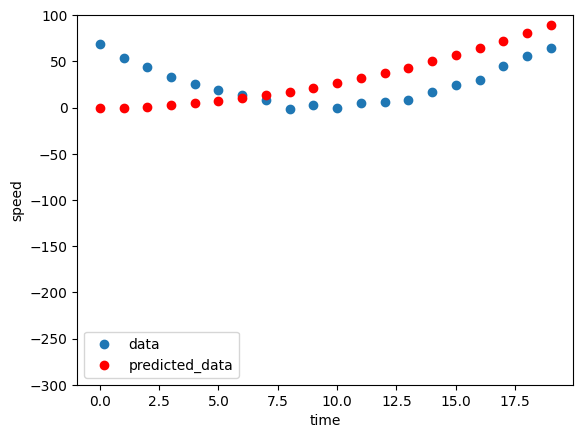

In [51]:
show_preds(preds)

##3. Lossni hisoblash

In [52]:
loss = mse(preds, speed)
loss

tensor(1033.8688, grad_fn=<MeanBackward0>)

##4. Gradientni hisoblash

In [53]:
loss.backward()
params.grad

tensor([6623.0654,  427.5949,   11.0462])

## 5. Step

In [54]:
lr = 1e-5   # lr - learning rate
params.data -= lr * params.grad.data
params.grad = None

## 6. 2-qadamga qaytib yana bashoratni amalga oshiramiz

In [55]:
preds = f(time, params)
# yangi bashorat uchun xatolikni hisoblash
mse(preds, speed)

tensor(768.4321, grad_fn=<MeanBackward0>)

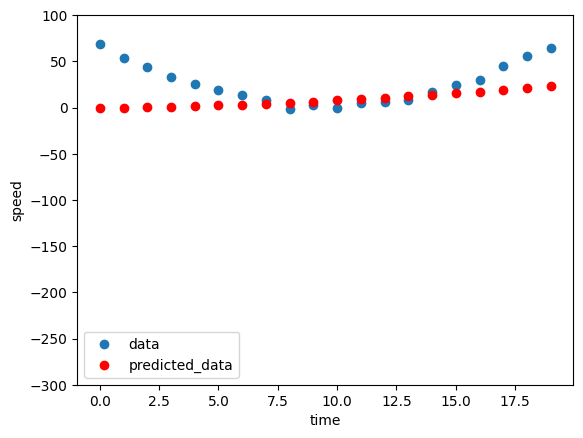

In [56]:
show_preds(preds)

In [58]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn:
        print("Loss:", loss.item())
    return preds

### 7. Istalgan epochgacha modelni o'qitish

In [59]:
for epoch in range(10):
    apply_step(params)

Loss: 768.43212890625
Loss: 667.5586547851562
Loss: 648.4675903320312
Loss: 644.852294921875
Loss: 644.1654052734375
Loss: 644.0328369140625
Loss: 644.0050048828125
Loss: 643.9970703125
Loss: 643.9928588867188
Loss: 643.9893188476562


### Bashorat natijalarini epochlar bo'yicha vizual ko'rinishi

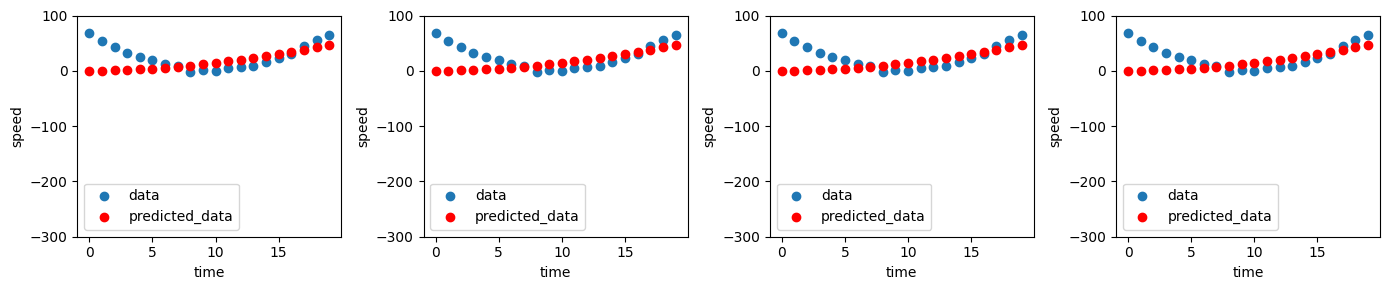

In [61]:
_, axs = plt.subplots(1, 4, figsize=(14, 3))
for ax in axs:
  show_preds(apply_step(params, prn=False), ax)
plt.tight_layout()
plt.show()

# Gradient Descent(GD), Stochastic Gradient Descent(SGD), Mini-batch

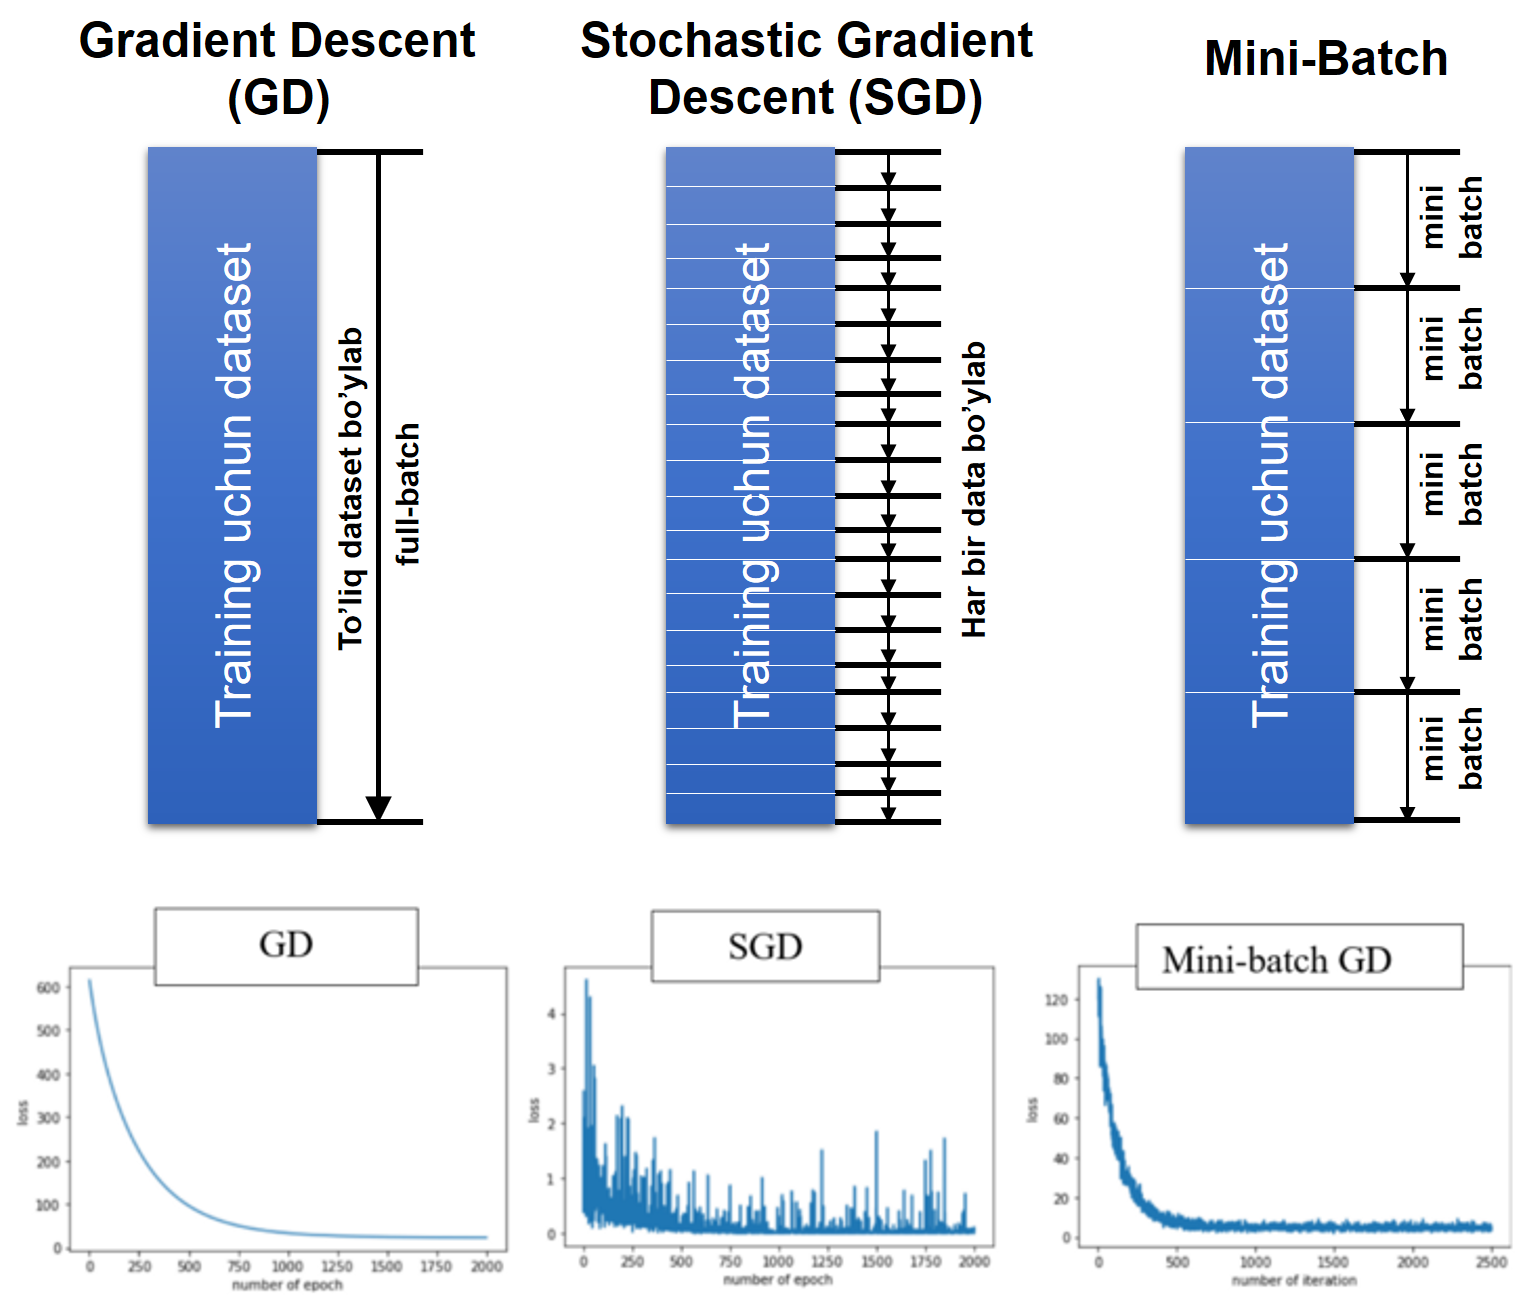